In [1]:
import os, torchvision, torch
import pickle, PIL
import numpy as np
import matplotlib.pyplot as plt

torchvision.models.vgg.model_urls["vgg16"] = "http://webia.lip6.fr/~robert/cours/rdfia/vgg16-397923af.pth"
os.environ["TORCH_HOME"] = "/tmp/torch"
vgg16 = torchvision.models.vgg16(pretrained=True)


Cardigan, Cardigan Welsh corgi : 0.04946232587099075
Siberian husky : 0.05325143411755562
dingo, warrigal, warragal, Canis dingo : 0.15400689840316772
Eskimo dog, husky : 0.18484827876091003
Pembroke, Pembroke Welsh corgi : 0.45142796635627747


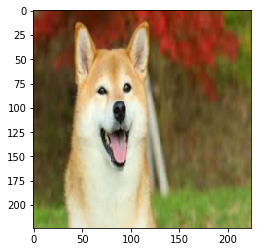

In [3]:
#loading, resizing
imagenet_classes = pickle.load(open('imagenet_classes.pkl','rb'))
image = PIL.Image.open("dog4.jfif")
image = image.resize((224, 224), PIL.Image.BILINEAR)
img = np.array(image, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

#preprocessing
u = [0.485, 0.456, 0.406]
sig = [0.229, 0.224, 0.225]
for i in range(len(u)) :
    img[i] = (img[i]-u[i])/sig[i]
    
#torch tensor
img = np.expand_dims(img, 0)
x = torch.Tensor(img)

#forward
y = vgg16.forward(x)
y = torch.nn.functional.softmax(y,dim=1)
y = y.detach().numpy() 

#Top 5 classification
indices = np.argsort(y[0])[-5:]
plt.figure()
plt.imshow(image)
plt.savefig('dog.jpeg')
for i in range(len(indices)):
    print("{} : {}".format(imagenet_classes[indices[i]], y[0,indices[i]]))  
    

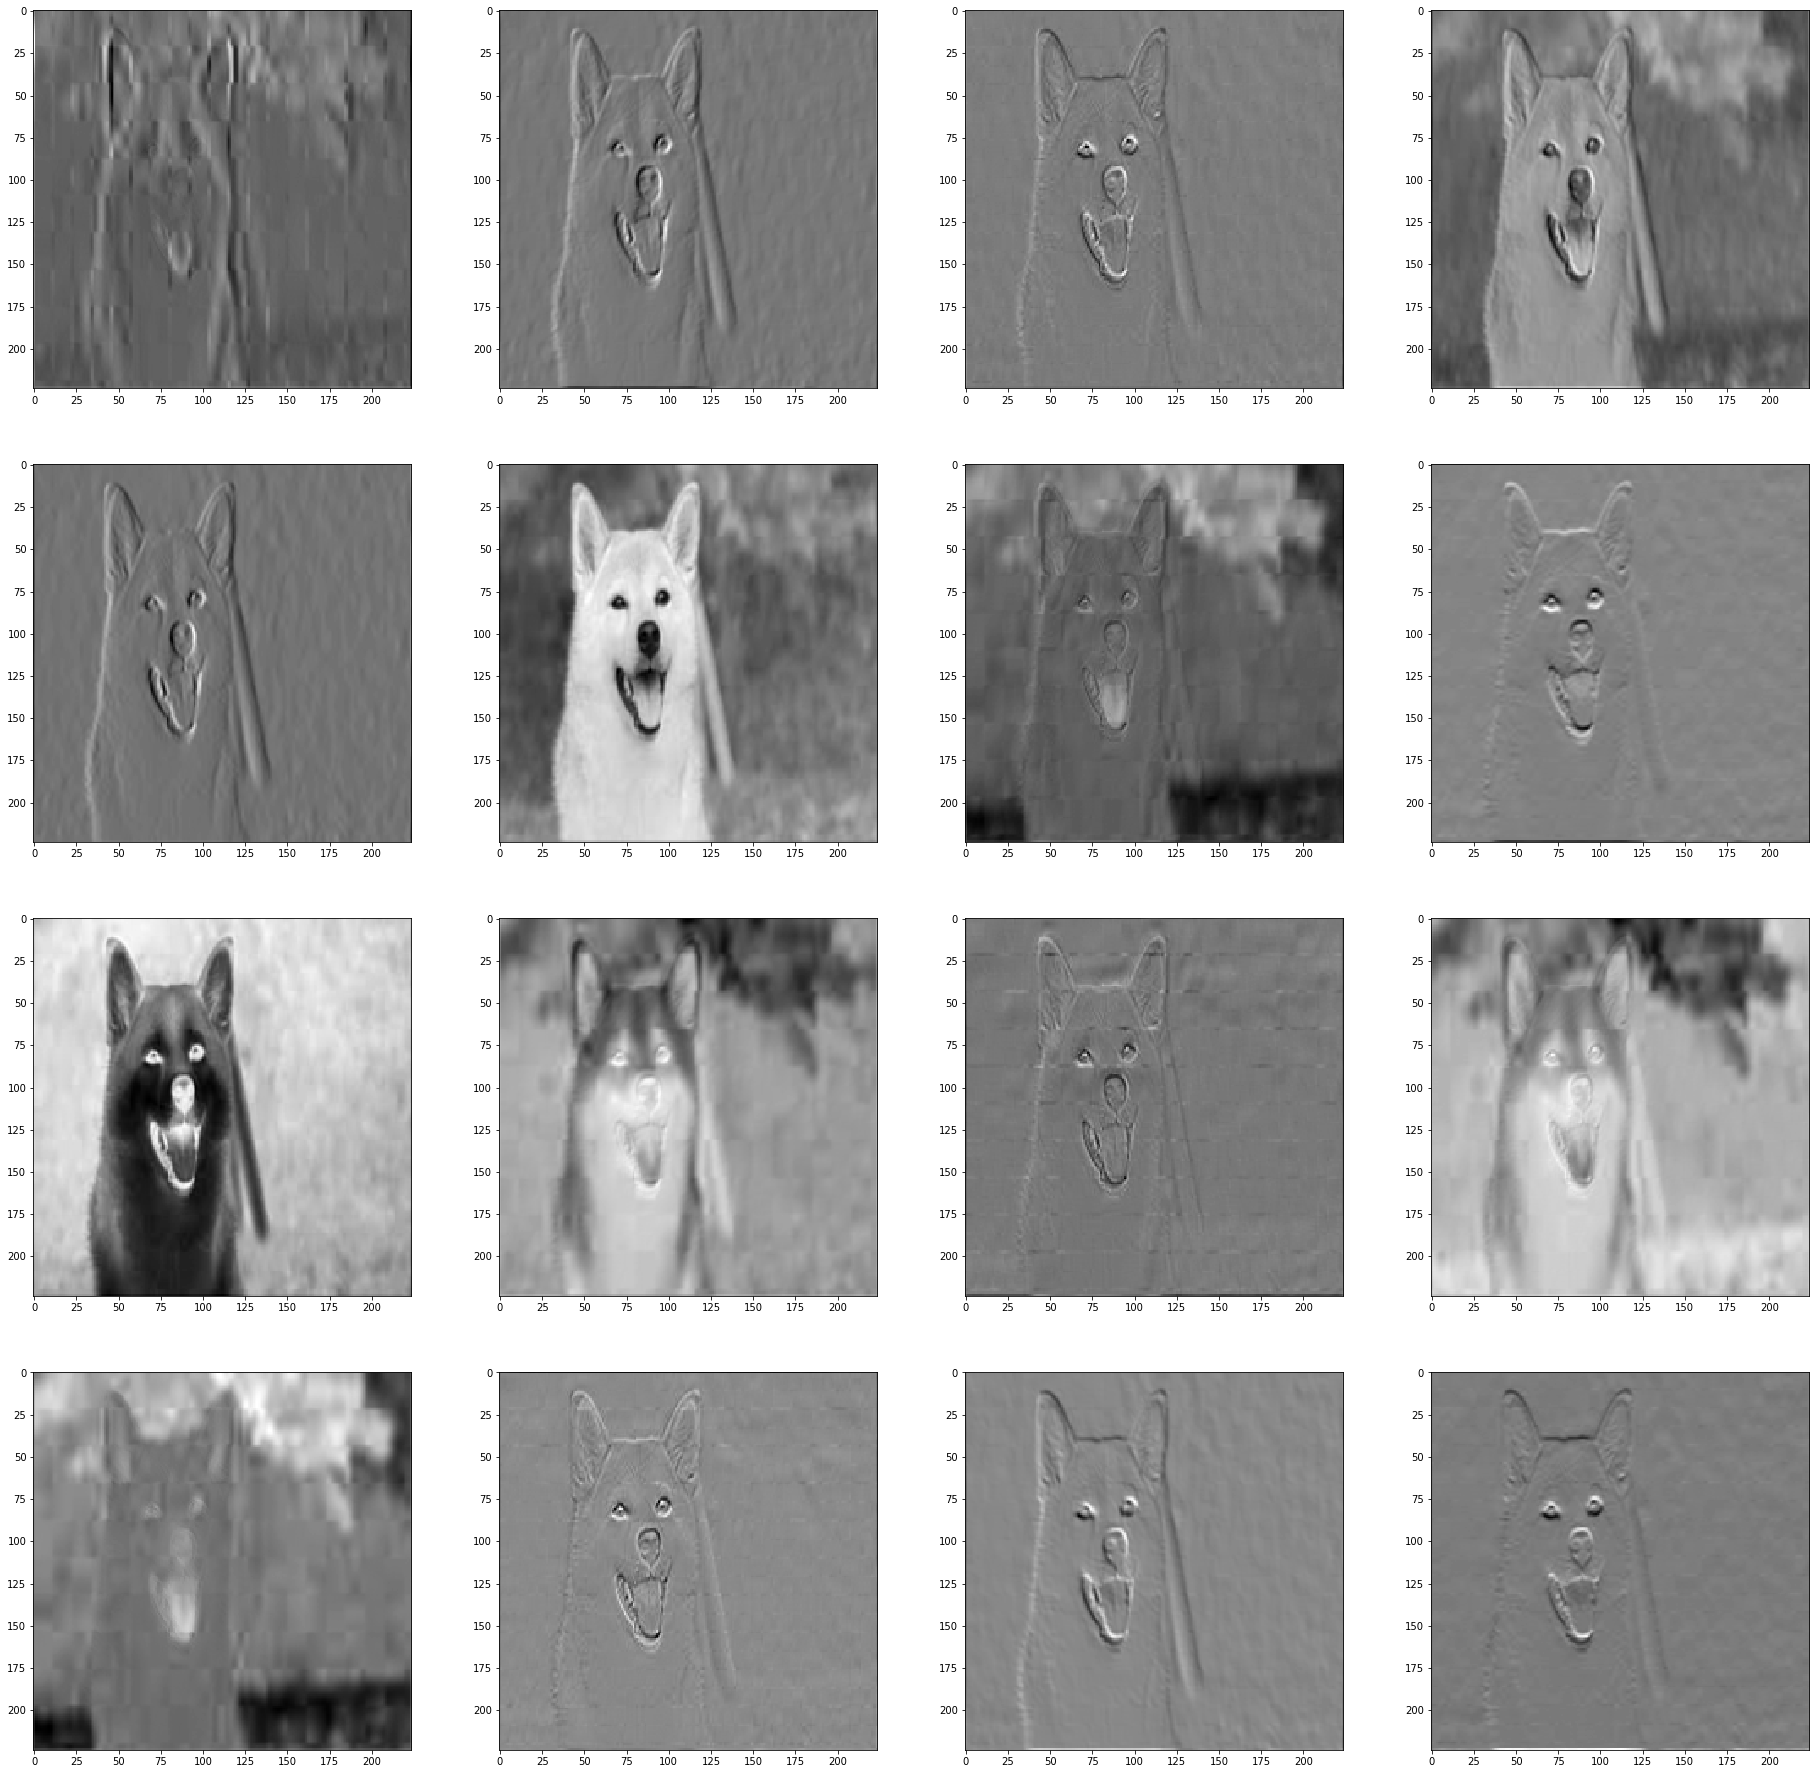

In [5]:
name = 'Cartes_conv1_VGG16'
model = vgg16

image = x
image = model.features[0](image)
fig,a = plt.subplots(4,4,figsize=(32,32))
for k in range(4):
    for l in range(4):
        map_conv1 = image[0,(k*8)+l].detach().numpy()
        a[k,l].imshow(map_conv1, cmap='gray')
plt.savefig('{}.jpeg'.format(name))
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

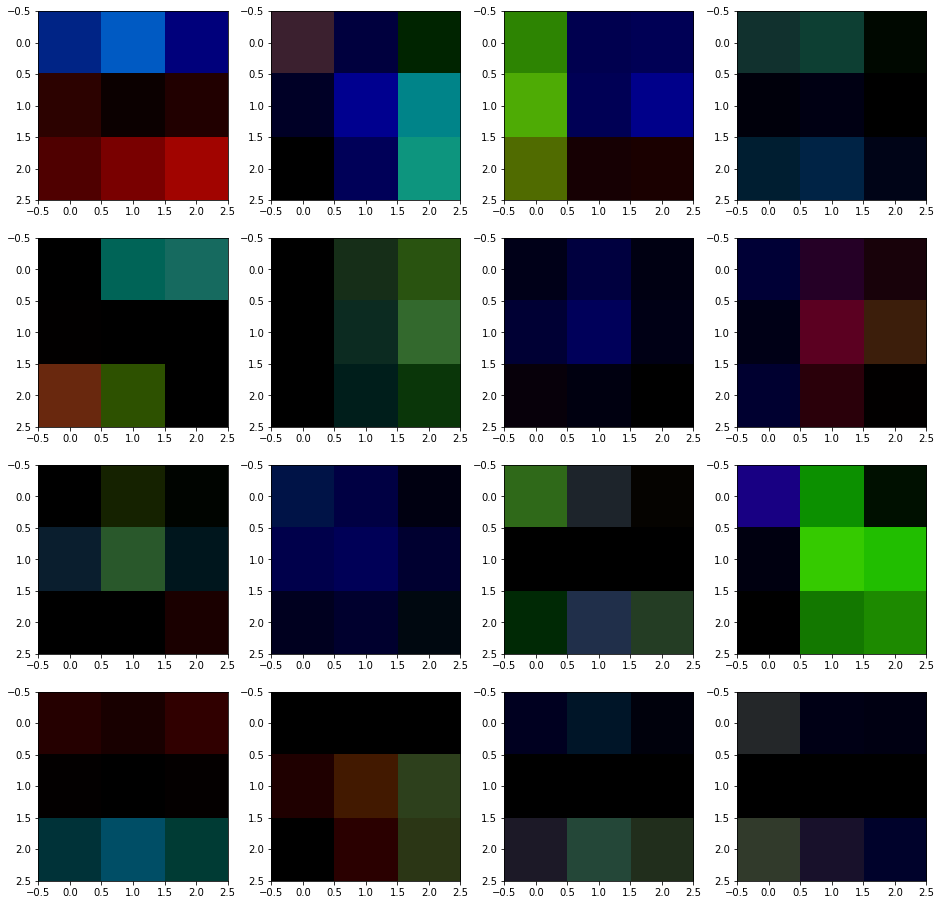

In [8]:
name = 'filters_conv1_VGG16'
model = vgg16

weights = model.features[0].weight
fig,a = plt.subplots(4,4,figsize=(16,16))
for k in range(4):
    for l in range(4):
        weight = weights[k*8+l].detach().numpy()
        a[k,l].imshow(weight, cmap='gray')
plt.savefig('{}.jpeg'.format(name))